In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [3]:
data = pd.read_csv(r"C:\Users\nmadh\OneDrive\Desktop\Project\hotel_bookings.csv")

In [4]:
data.shape

(119390, 32)

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data.drop(['agent','company'] ,axis=1 ,inplace = True)

In [8]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [9]:
data['country'] = data['country'].fillna('PRT')
data['children'] = data['children'].fillna(0)

In [10]:
data = data[~( (data['children']==0 ) & (data['babies']==0) & (data['adults']==0) )]
data.shape

(119210, 30)

In [11]:
data1 = data[data['is_canceled'] == 0] #not cancelled

In [12]:
country_analysis =(data1['country'].value_counts()/len(data1) ).reset_index()
country_analysis.columns = ['country','percentage_of_people']
country_analysis

,country,percentage_of_people
0,PRT,0.285265
1,GBR,0.128888
2,FRA,0.112890
3,ESP,0.085094
4,DEU,0.080881
...,...,...
160,BHR,0.000013
161,DJI,0.000013
162,MLI,0.000013
163,NPL,0.000013


In [13]:
#plot try
data1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0.5, 1.0, 'Avg Daily rate Vs Room type')

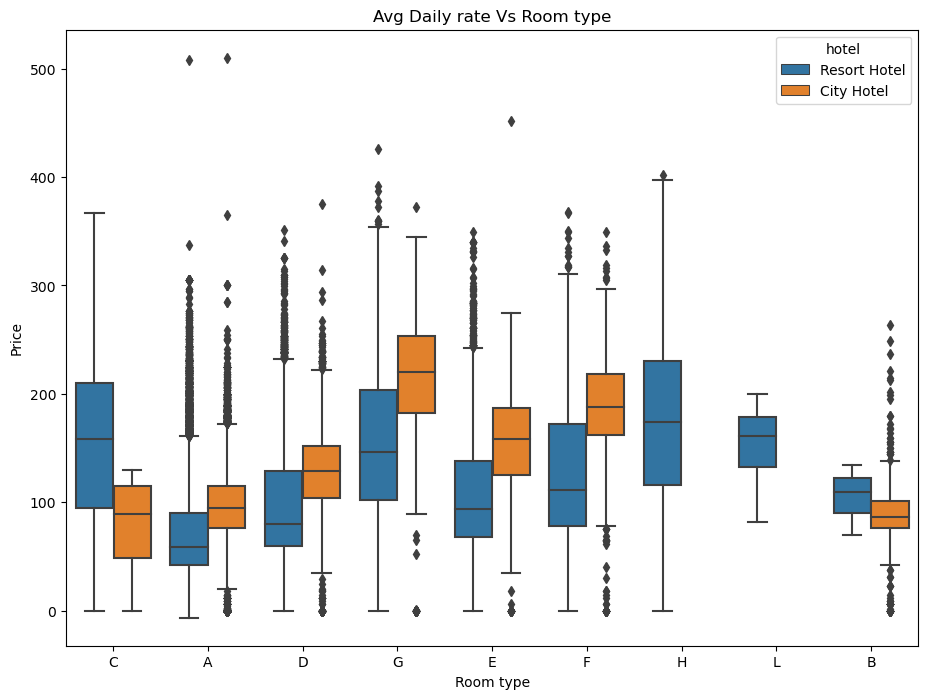

In [14]:
plt.figure(figsize=(11,8))
sns.boxplot(x ='reserved_room_type', y='adr', hue = 'hotel',data=data1)
plt.xlabel('Room type')
plt.ylabel('Price')
plt.title('Avg Daily rate Vs Room type')

     

In [15]:
data1['hotel'].value_counts()

City Hotel      46084
Resort Hotel    28927
Name: hotel, dtype: int64

In [16]:
x = len(data1['hotel']=='Resort Hotel')
resort_data = (data1[data1['hotel'] =='Resort Hotel']['arrival_date_month'].value_counts()).reset_index()
resort_data.columns=['month','guest on resort']
resort_data

city_data = (data1[data1['hotel']=='City Hotel']['arrival_date_month'].value_counts()).reset_index()
city_data.columns=['month','guest on city']
city_data

month_vs_guest = resort_data.merge(city_data,on='month')
month_vs_guest

,month,guest on resort,guest on city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [17]:
import sort_dataframeby_monthorweek as sdm
month_vs_guest = sdm.Sort_Dataframeby_Month(month_vs_guest,'month')
month_vs_guest

,month,guest on resort,guest on city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [18]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [19]:
pd.crosstab(index = data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
def weekend(row):
    i = 'stays_in_weekend_nights'
    j = 'stays_in_week_nights'
    
    if row[i] == 0 and row[j] > 0:
        return 'guest_stayed_in_weekdays'
    elif row[j] == 0 and row[i] > 0:
        return 'guest_stayed_in_weekends'
    elif row[i] > 0 and row[j] > 0:
        return 'guest_stayed_both_weekends_and_weekdays'
    else:
        return 'undefined'
    


In [21]:
data1['guest_stayed']=data1.apply(weekend,axis=1)
data1['guest_stayed'].value_counts()


guest_stayed_both_weekends_and_weekdays    37551
guest_stayed_in_weekdays                   31788
guest_stayed_in_weekends                    5050
undefined                                    622
Name: guest_stayed, dtype: int64

In [22]:
data2 = data1.groupby(['arrival_date_month','guest_stayed']).size().unstack().reset_index()
data2 = sdm.Sort_Dataframeby_Month(data2,'arrival_date_month')
data2.set_index('arrival_date_month',inplace=True)
data2


,guest_stayed_both_weekends_and_weekdays,guest_stayed_in_weekdays,guest_stayed_in_weekends,undefined
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<Axes: xlabel='arrival_date_month'>

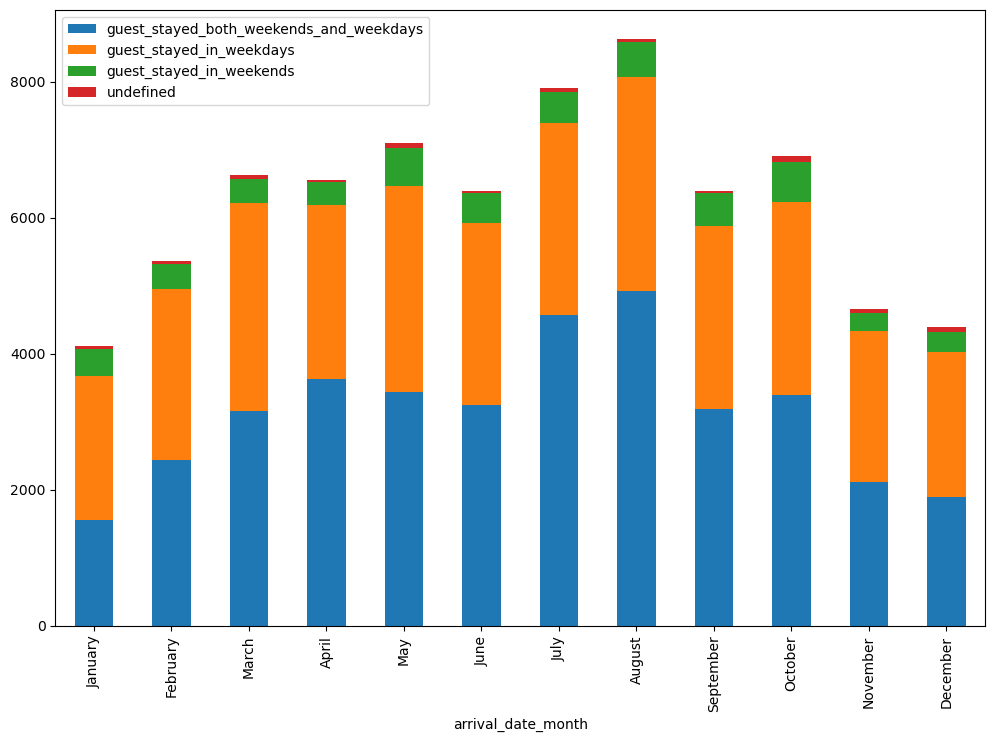

In [23]:
data2.plot(kind='bar',stacked=True,figsize=(12,8))

In [24]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
data['total_family_members'] = data['children'] + data['babies'] + data['adults']
data['total_nights_spend'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']


In [26]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [27]:
def deposit(row):
    if row['deposit_type'] == 'No Deposit' or row['deposit_type'] == 'Refundable':
        return 0
    else:
        return 1

In [28]:
data['deposit']=data.apply(deposit,axis=1)


In [29]:
data.drop(columns=['children', 'babies', 'adults', 'deposit_type'], axis=1 ,inplace=True)


In [30]:
#feature encoding (mean encoding)

In [31]:
cat_features = [col for col in data.columns if data[col].dtypes== 'object']
num_features = [col for col in data.columns if data[col].dtypes!= 'object']
cat_data = data[cat_features]
num_data = data[num_features]
cat_data['is_canceled'] = data['is_canceled']
cat_data


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015,0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015,0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,Transient,Check-Out,9/6/2017,0
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,Transient,Check-Out,9/7/2017,0
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,Transient,Check-Out,9/7/2017,0
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,9/7/2017,0


In [32]:
cat_data.groupby(['hotel'])['is_canceled'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: is_canceled, dtype: float64

In [33]:
column = cat_data.columns
column = column[0:-1] 
column

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [34]:
feature_list=[]
for col in column:
    cat_dict = cat_data.groupby([col])['is_canceled'].mean().to_dict()
    feature_list.append(cat_dict)
    cat_data[col]=cat_data[col].map(cat_dict)
feature_list    

[{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815},
 {'April': 0.40783534934103627,
  'August': 0.37782266791717767,
  'December': 0.35034768456872317,
  'February': 0.3344510680576254,
  'January': 0.305016044587063,
  'July': 0.37464409996836445,
  'June': 0.41485954799158203,
  'March': 0.32227682227682225,
  'May': 0.3970288624787776,
  'November': 0.31309998523113275,
  'October': 0.38090966179241054,
  'September': 0.3919047619047619},
 {'BB': 0.3741055553146277,
  'FB': 0.5989974937343359,
  'HB': 0.3446534790427445,
  'SC': 0.3740638923120675,
  'Undefined': 0.2446535500427716},
 {'ABW': 0.0,
  'AGO': 0.5662983425414365,
  'AIA': 0.0,
  'ALB': 0.16666666666666666,
  'AND': 0.7142857142857143,
  'ARE': 0.8431372549019608,
  'ARG': 0.2523364485981308,
  'ARM': 0.25,
  'ASM': 0.0,
  'ATA': 0.0,
  'ATF': 0.0,
  'AUS': 0.2511737089201878,
  'AUT': 0.18210609659540775,
  'AZE': 0.5294117647058824,
  'BDI': 0.0,
  'BEL': 0.20239111870196413,
  'BEN': 1.0,
  'BFA'

In [35]:
cat_data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.0,0.985075,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0.0,0.985075,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.522876,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.202391,0.343313,0.410598,0.391567,0.445055,0.407864,0.0,0.000000,0
119386,0.417859,0.377823,0.374106,0.185848,0.367590,0.410598,0.292683,0.251603,0.407864,0.0,0.000000,0
119387,0.417859,0.377823,0.374106,0.167193,0.367590,0.410598,0.318108,0.251373,0.407864,0.0,0.000000,0
119388,0.417859,0.377823,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.000000,0


In [36]:
merged_num_data = cat_data.merge(num_data,left_index=True,right_index=True)
merged_num_data.drop('is_canceled_y',axis=1,inplace=True)
merged_num_data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,total_nights_spend,deposit
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,...,0,0,3,0,0.00,0,0,2.0,0,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,...,0,0,4,0,0.00,0,0,2.0,0,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.0,...,0,0,0,0,75.00,0,0,1.0,1,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0.0,...,0,0,0,0,75.00,0,0,1.0,1,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,...,0,0,0,0,98.00,0,1,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.202391,0.343313,0.410598,0.391567,0.445055,0.407864,0.0,...,0,0,0,0,96.14,0,0,2.0,7,0
119386,0.417859,0.377823,0.374106,0.185848,0.367590,0.410598,0.292683,0.251603,0.407864,0.0,...,0,0,0,0,225.43,0,2,3.0,7,0
119387,0.417859,0.377823,0.374106,0.167193,0.367590,0.410598,0.318108,0.251373,0.407864,0.0,...,0,0,0,0,157.71,0,4,2.0,7,0
119388,0.417859,0.377823,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,...,0,0,0,0,104.40,0,0,2.0,7,0


In [37]:
merged_num_data.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'is_canceled_x', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_family_members', 'total_nights_spend', 'deposit'],
      dtype='object')

In [38]:
#handling outliers

<Figure size 1000x800 with 0 Axes>

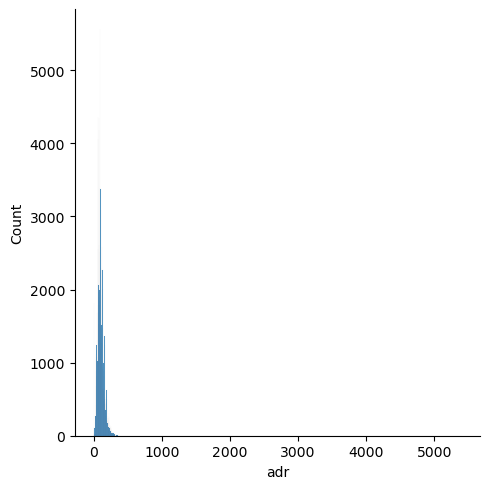

In [39]:
plt.figure(figsize=(10,8))
sns.displot(merged_num_data['adr'])


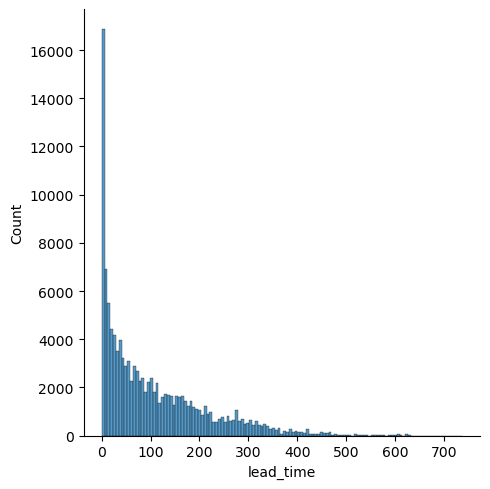

In [40]:
sns.displot(merged_num_data['lead_time'])

In [41]:
merged_num_data['lead_time'] = np.log1p(merged_num_data['lead_time'])


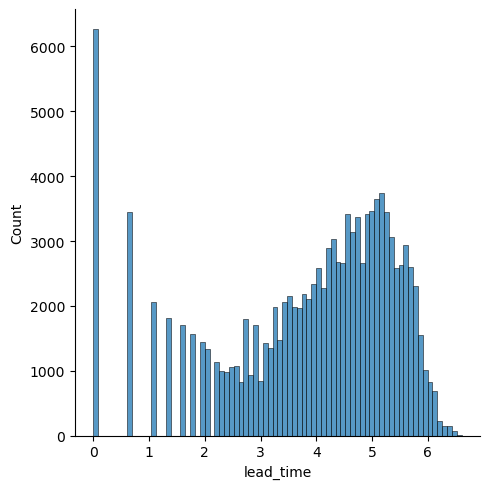

In [42]:
sns.displot(merged_num_data['lead_time'])

In [43]:
corelation = merged_num_data.corr()
corelation

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,total_nights_spend,deposit
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.012261,-0.004467,-0.076598,0.072725,0.098522,-0.218961,-0.043478,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,0.008800,-0.021971,-0.011049,0.029164,0.280913,-0.021910,0.002763,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.103606,0.011109,-0.027189,-0.031562,-0.034308,0.003455,0.006875,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.093266,0.091795,-0.061513,0.067054,-0.132603,0.007613,-0.200822,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,0.074710,-0.117519,-0.057578,0.096385,-0.113251,-0.145726,-0.155463,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.003868,-0.142650,-0.118461,0.048001,0.044939,-0.146562,0.075047,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.049290,0.022533,-0.040134,0.068336,-0.301822,-0.093401,-0.161406,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,0.063309,-0.003205,-0.096277,0.067129,-0.184677,-0.131035,-0.135337,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,-0.021358,0.024716,-0.095486,-0.101833,0.175360,0.061786,0.137114,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,0.110139,-0.057365,-0.144832,0.054301,0.046492,-0.195701,-0.234877,0.044826,0.018554,0.481507


In [44]:
corelation['is_canceled_x'].sort_values(ascending=True)

total_of_special_requests        -0.234877
required_car_parking_spaces      -0.195701
booking_changes                  -0.144832
is_repeated_guest                -0.083745
previous_bookings_not_canceled   -0.057365
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
arrival_date_week_number          0.008315
arrival_date_year                 0.016622
total_nights_spend                0.018554
stays_in_week_nights              0.025542
total_family_members              0.044826
adr                               0.046492
meal                              0.050584
days_in_waiting_list              0.054301
arrival_date_month                0.069886
reserved_room_type                0.072769
previous_cancellations            0.110139
customer_type                     0.136617
hotel                             0.137082
distribution_channel              0.177167
assigned_room_type                0.201570
market_segment                    0.267006
lead_time  

In [45]:
merged_num_data.drop(['reservation_status','reservation_status_date','total_nights_spend','arrival_date_week_number','arrival_date_year','stays_in_weekend_nights','arrival_date_day_of_month'],axis=1,inplace=True)
merged_num_data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled_x,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,deposit
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0,...,0,0,0,3,0,0.00,0,0,2.0,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0,...,0,0,0,4,0,0.00,0,0,2.0,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0,...,0,0,0,0,0,75.00,0,0,1.0,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0,...,0,0,0,0,0,75.00,0,0,1.0,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0,...,0,0,0,0,0,98.00,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.202391,0.343313,0.410598,0.391567,0.445055,0.407864,0,...,0,0,0,0,0,96.14,0,0,2.0,0
119386,0.417859,0.377823,0.374106,0.185848,0.367590,0.410598,0.292683,0.251603,0.407864,0,...,0,0,0,0,0,225.43,0,2,3.0,0
119387,0.417859,0.377823,0.374106,0.167193,0.367590,0.410598,0.318108,0.251373,0.407864,0,...,0,0,0,0,0,157.71,0,4,2.0,0
119388,0.417859,0.377823,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0,...,0,0,0,0,0,104.40,0,0,2.0,0


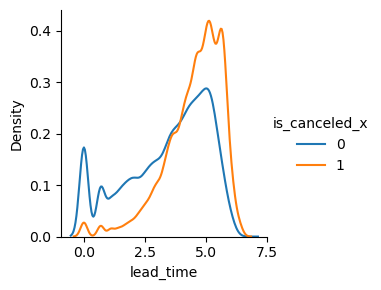

In [46]:
sns.FacetGrid(merged_num_data,hue='is_canceled_x').map(sns.kdeplot,'lead_time').add_legend()

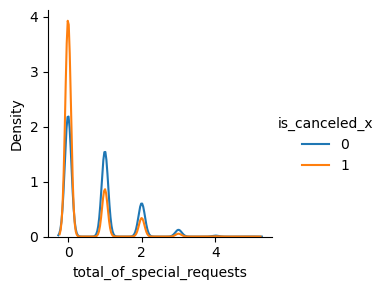

In [47]:
sns.FacetGrid(merged_num_data,hue='is_canceled_x').map(sns.kdeplot,'total_of_special_requests').add_legend()

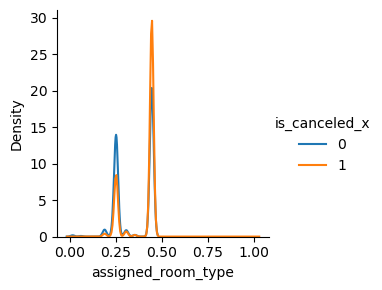

In [48]:
sns.FacetGrid(merged_num_data,hue='is_canceled_x').map(sns.kdeplot,'assigned_room_type').add_legend()

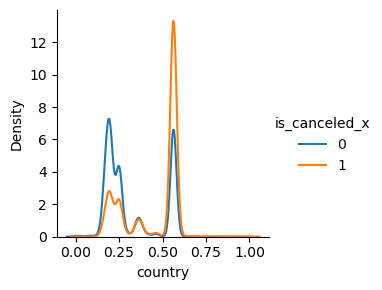

In [49]:
sns.FacetGrid(merged_num_data,hue='is_canceled_x').map(sns.kdeplot,'country').add_legend()

In [50]:
merged_num_data.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'is_canceled_x', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_family_members', 'deposit'],
      dtype='object')

In [51]:
X = merged_num_data.drop(['is_canceled_x'],axis=1)
X

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,lead_time,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,deposit
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,5.837730,...,0,0,0,3,0,0.00,0,0,2.0,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,6.603944,...,0,0,0,4,0,0.00,0,0,2.0,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,2.079442,...,0,0,0,0,0,75.00,0,0,1.0,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,2.639057,...,0,0,0,0,0,75.00,0,0,1.0,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,2.708050,...,0,0,0,0,0,98.00,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.202391,0.343313,0.410598,0.391567,0.445055,0.407864,3.178054,...,0,0,0,0,0,96.14,0,0,2.0,0
119386,0.417859,0.377823,0.374106,0.185848,0.367590,0.410598,0.292683,0.251603,0.407864,4.634729,...,0,0,0,0,0,225.43,0,2,3.0,0
119387,0.417859,0.377823,0.374106,0.167193,0.367590,0.410598,0.318108,0.251373,0.407864,3.555348,...,0,0,0,0,0,157.71,0,4,2.0,0
119388,0.417859,0.377823,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,4.700480,...,0,0,0,0,0,104.40,0,0,2.0,0


In [52]:
Y = merged_num_data['is_canceled_x']
Y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled_x, Length: 119210, dtype: int64

In [53]:
#feature selection

In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [55]:
estimator = Lasso(alpha = 0.005)

In [56]:
sfm = SelectFromModel(estimator)
sfm.fit(X,Y)
selected_features = X.columns[sfm.get_support()]
selected_features

Index(['country', 'lead_time', 'stays_in_week_nights',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_family_members', 'deposit'],
      dtype='object')

In [57]:
X=X[selected_features]
X

,country,lead_time,stays_in_week_nights,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,deposit
0,0.562958,5.837730,0,0,0,3,0,0.00,0,0,2.0,0
1,0.562958,6.603944,0,0,0,4,0,0.00,0,0,2.0,0
2,0.202310,2.079442,1,0,0,0,0,75.00,0,0,1.0,0
3,0.202310,2.639057,1,0,0,0,0,75.00,0,0,1.0,0
4,0.202310,2.708050,2,0,0,0,0,98.00,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.202391,3.178054,5,0,0,0,0,96.14,0,0,2.0,0
119386,0.185848,4.634729,5,0,0,0,0,225.43,0,2,3.0,0
119387,0.167193,3.555348,5,0,0,0,0,157.71,0,4,2.0,0
119388,0.202310,4.700480,5,0,0,0,0,104.40,0,0,2.0,0


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [59]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,Y_test)
cm

array([[17756,  5178],
       [  977,  5892]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

0.7934771667281817

In [62]:
#cross- validate

In [63]:
from sklearn.model_selection import cross_val_score 
score = cross_val_score(clf,X,Y,cv=10)
score.mean()

0.7788859994966866

In [64]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [65]:
ac=[]
bnb = BernoulliNB()

bnb.fit(X_train,Y_train)
y_pred2 = bnb.predict(X_test)
ac.append(accuracy_score(Y_test,y_pred2))
accuracy_score(Y_test,y_pred2)

0.7642519209475556

In [66]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,Y_train)
y_pred3 = dtc.predict(X_test)
ac.append(accuracy_score(Y_test,y_pred3))
accuracy_score(Y_test,y_pred3)

0.817971345166594

In [67]:
from sklearn.model_selection import KFold
rfc = RandomForestClassifier()

kf = KFold(n_splits =5,shuffle =True)

rfc.fit(X_train,Y_train)
y_pred4 = rfc.predict(X_test)
ac.append(accuracy_score(Y_test,y_pred4))
accuracy_score(Y_test,y_pred4)

0.8555179008824615

In [68]:
score = cross_val_score(rfc,X,Y,cv=kf)
score

array([0.85668149, 0.85450046, 0.85286469, 0.85286469, 0.85802366])

In [69]:
knn = KNeighborsClassifier()

knn.fit(X_train,Y_train)
y_pred5 = knn.predict(X_test)
ac.append(accuracy_score(Y_test,y_pred5))
accuracy_score(Y_test,y_pred5)

0.8015300473106735

In [70]:
ac

[0.7642519209475556, 0.817971345166594, 0.8555179008824615, 0.8015300473106735]

In [71]:
import statistics
statistics.mean(ac)

0.8098178035768211

In [72]:
selected_features

Index(['country', 'lead_time', 'stays_in_week_nights',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_family_members', 'deposit'],
      dtype='object')

In [73]:
column

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [75]:
user_input=[]

In [76]:
country = input("Enter your country code:")

Enter your country code:ESP


In [77]:
lead_time = int(input("Enter the lead time:"))

Enter the lead time:16


In [78]:
 stay_in_week_night = int(input("No of week nights you wish to stay:"))

No of week nights you wish to stay:3


In [79]:
previous_cancelations = int(input("No of previous cancelations(if null write 0 else the number of times your booking got canceled):"))

No of previous cancelations(if null write 0 else the number of times your booking got canceled):0


In [80]:
previous_bookings_not_canceled = int(input("No of times your booking succeded:"))

No of times your booking succeded:0


In [81]:
booking_changes = int(input("No. of booking changes made in past:"))

No. of booking changes made in past:0


In [82]:
days_in_waiting_list = int(input("No. of days in waiting list:"))

No. of days in waiting list:0


In [83]:
adr = int(input("Average daily rate:"))

Average daily rate:123


In [84]:
required_car_parking_spaces = int(input("Required car parking spaces:"))

Required car parking spaces:0


In [85]:
total_of_special_requests = int(input("Total no. of special requests:"))

Total no. of special requests:0


In [86]:
total_family_members = int(input("Total no. of family members:"))

Total no. of family members:2


In [87]:
deposit = int(input("Enter your deposit type: if(no deposit or refundable enter 0 else enter 1):"))

Enter your deposit type: if(no deposit or refundable enter 0 else enter 1):0


In [88]:
user_input.append(feature_list[3][country])
user_input.append(lead_time)
user_input.append(stay_in_week_night)
user_input.append(previous_cancelations)
user_input.append(previous_bookings_not_canceled)
user_input.append(booking_changes)
user_input.append(days_in_waiting_list)
user_input.append(adr)
user_input.append(required_car_parking_spaces)
user_input.append(total_of_special_requests)
user_input.append(total_family_members)
user_input.append(deposit)

In [90]:
df = pd.DataFrame([user_input],columns = selected_features)

In [91]:
df

,country,lead_time,stays_in_week_nights,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_family_members,deposit
0,0.254322,16,3,0,0,0,0,123,0,0,2,0


In [92]:
output = rfc.predict(df)

In [93]:
if output == 1:
    print('Your booking is more likely to be cancelled')
if output == 0:
    print('Your booking is more likely to be confirmed')

Your booking is more likely to be cancelled
